In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Modern AI Portfolio Builder/Emotion AI Dataset

/content/drive/MyDrive/Colab Notebooks/Modern AI Portfolio Builder/Emotion AI Dataset


In [3]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [4]:
keyfacial_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Modern AI Portfolio Builder/Emotion AI Dataset/data.csv')

In [5]:
keyfacial_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [6]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [7]:
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [8]:
keyfacial_df['Image'].shape

(2140,)

In [9]:
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [10]:
keyfacial_df['Image'][0].shape

(96, 96)

In [11]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

/tmp/ipython-input-12-3186431225.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


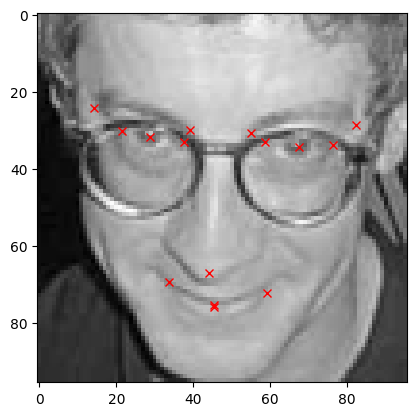

In [12]:
i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

/tmp/ipython-input-13-2146576359.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


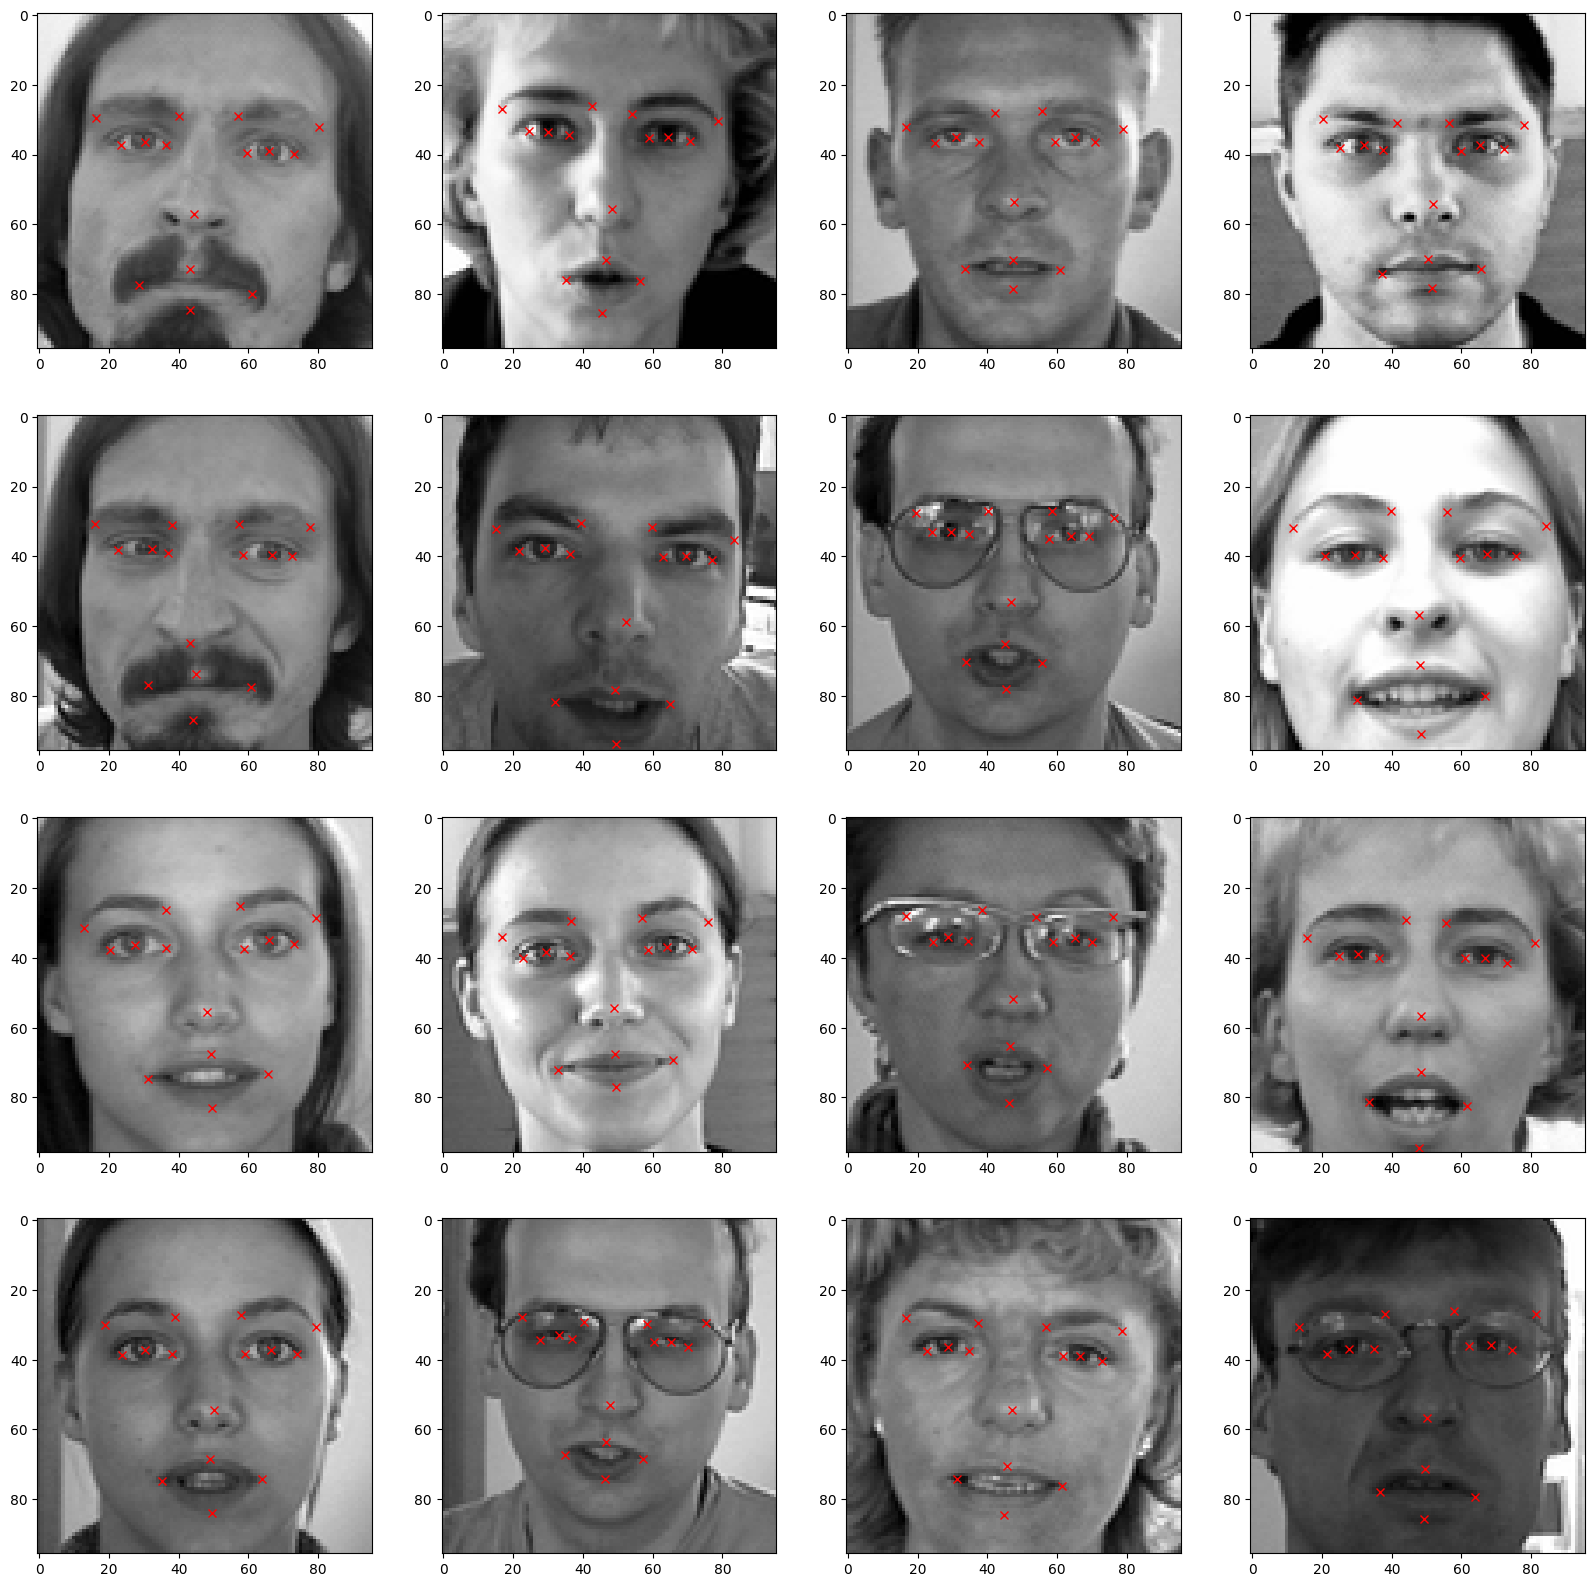

In [13]:
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

/tmp/ipython-input-14-1894950480.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')


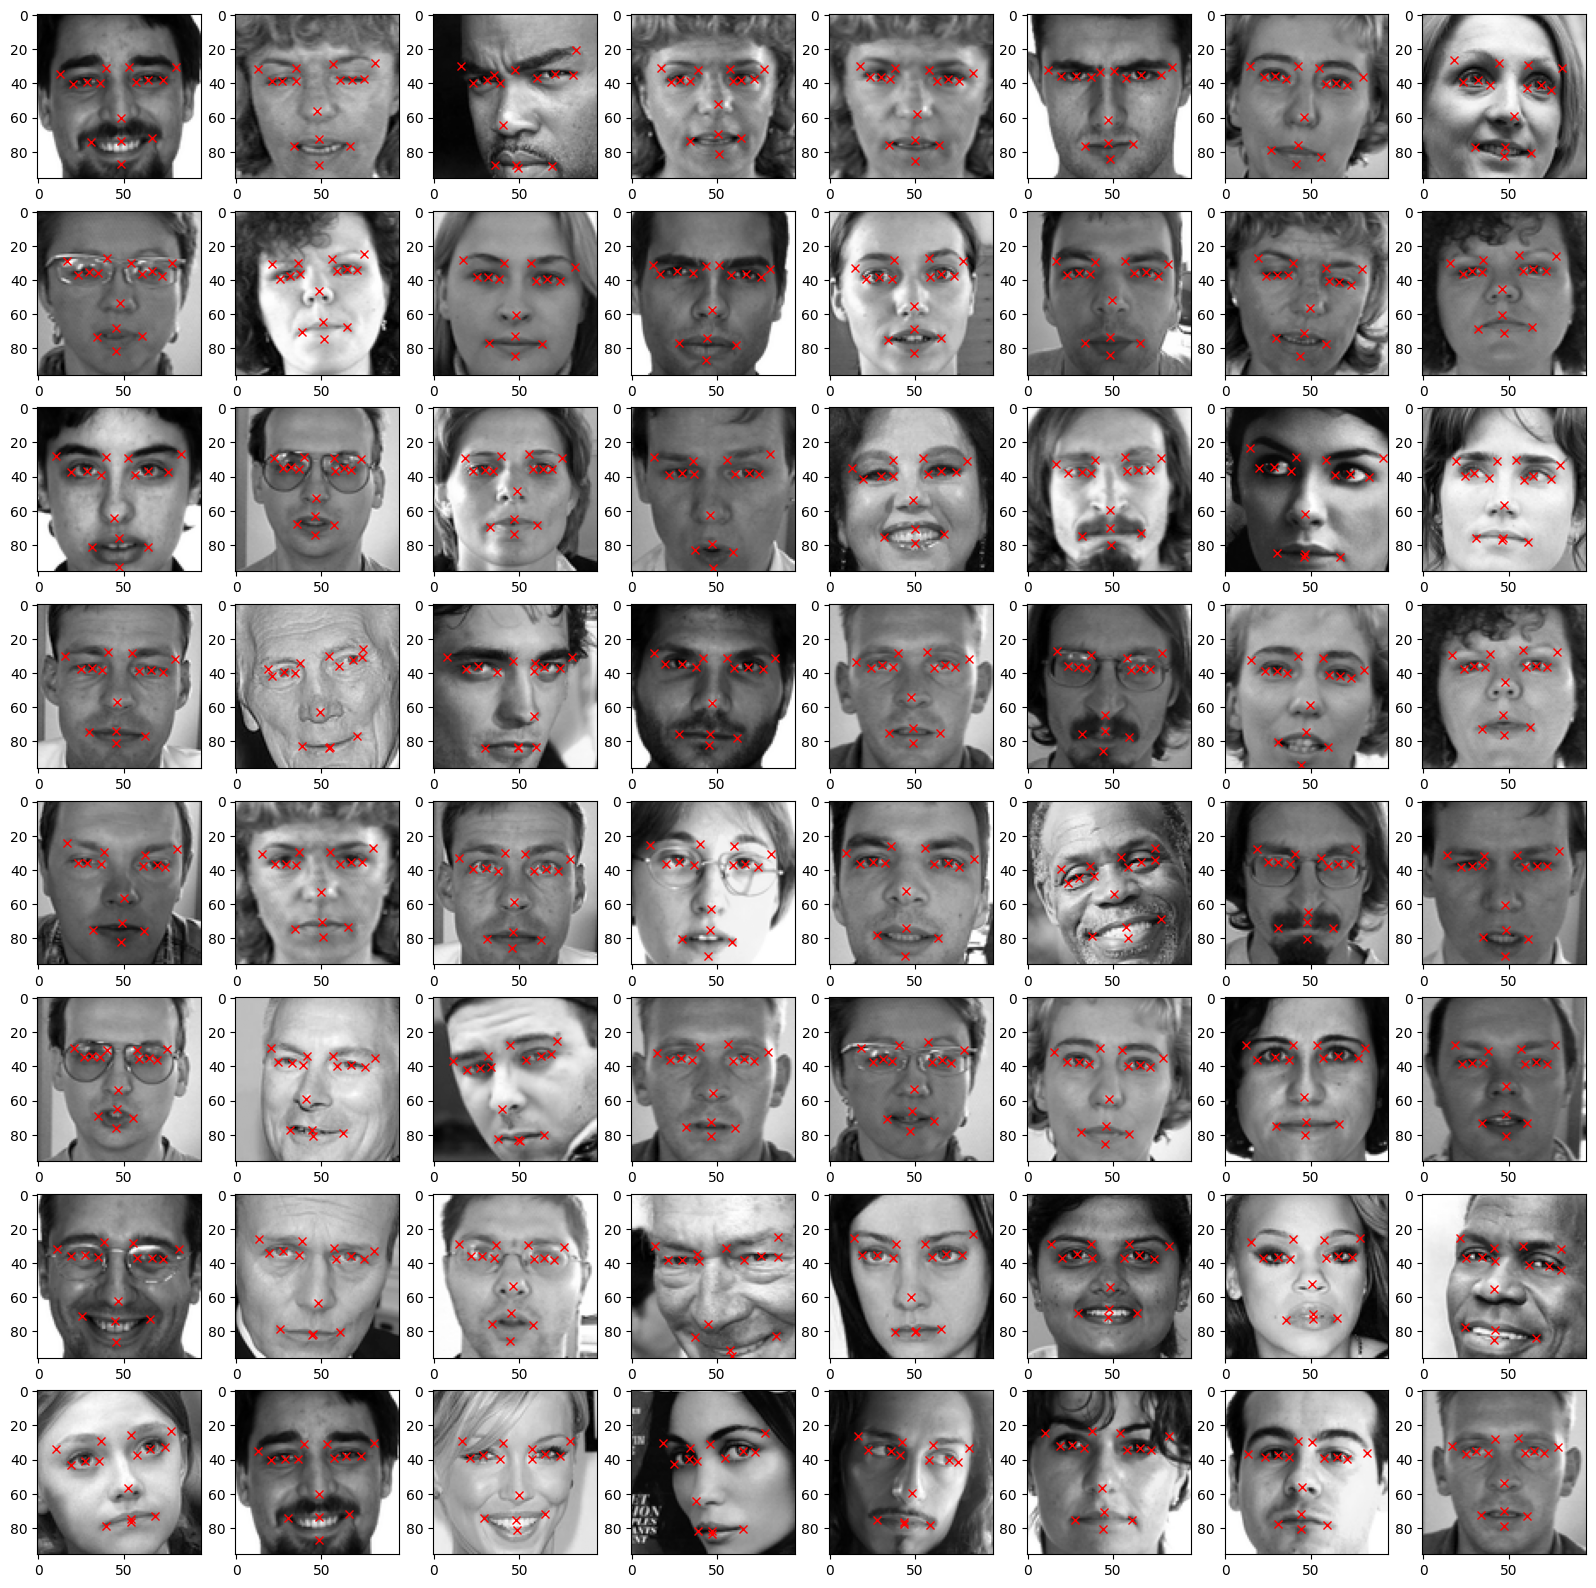

In [14]:
import random

fig = plt.figure(figsize=(20, 20))

for i in range(64):
    k = random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(keyfacial_df['Image'][k],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')

In [15]:
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [16]:
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [17]:

keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))


for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

/tmp/ipython-input-18-844006773.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')


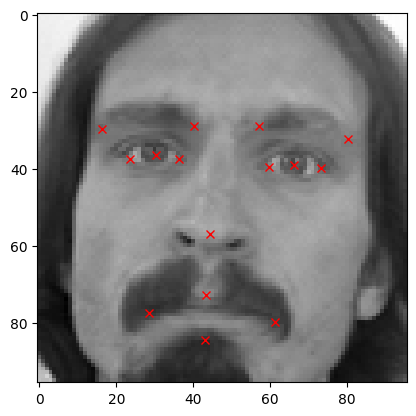

In [18]:
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

/tmp/ipython-input-19-1964030110.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


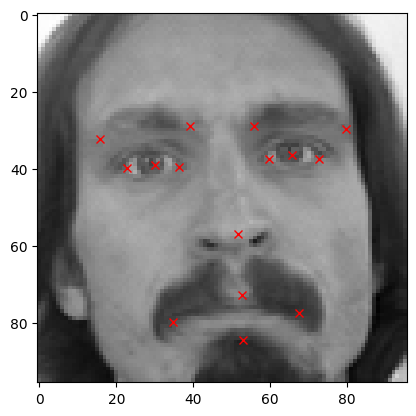

In [19]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [20]:
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [21]:
augmented_df.shape

(4280, 31)

In [22]:
import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

/tmp/ipython-input-23-3595391385.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


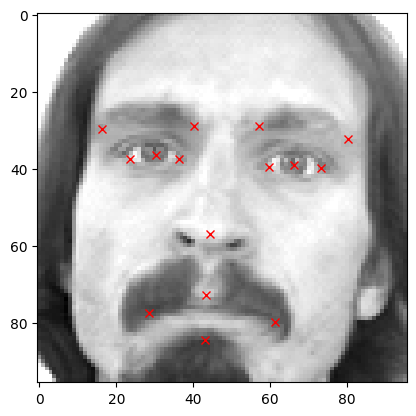

In [23]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [24]:
keyfacial_df_copy = copy.copy(keyfacial_df)

In [25]:
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

/tmp/ipython-input-26-3595391385.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


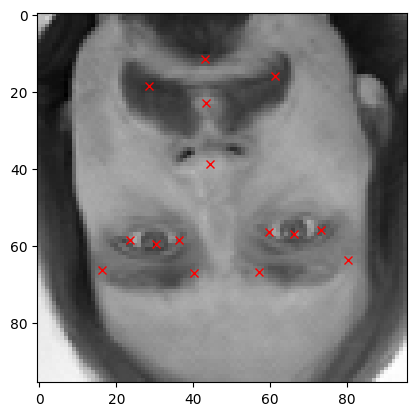

In [26]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [27]:
# Obtain the value of images which is present in the 31st column (since index start from 0, we refer to 31st column by 30)
img = augmented_df[:,30]

# Normalize the images
img = img/255.

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [28]:
# Obtain the value of x & y coordinates which are to used as target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
X_train.shape

(5136, 96, 96, 1)

In [31]:
X_test.shape

(1284, 96, 96, 1)

In [32]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.initializers import glorot_uniform

def res_block(X, filters, stage, downsample=False):
    """
    Implements a residual block with convolutional and identity blocks.
    If downsample=True, performs spatial downsampling with stride 2.

    Arguments:
    X -- input tensor
    filters -- list of integers, the number of filters in the CONV layers of the main path
    stage -- integer, used to name layers uniquely
    downsample -- boolean, whether to downsample spatially using stride=2

    Returns:
    X -- output tensor after passing through the block
    """

    X_copy = X
    f1, f2, f3 = filters

    strides = (2, 2) if downsample else (1, 1)

    # Main Path - Convolutional Block
    X = Conv2D(f1, (1,1), strides=strides,
               name='res_'+str(stage)+'_conv_a',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, (3,3), padding='same', strides=(1,1),
               name='res_'+str(stage)+'_conv_b',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, (1,1), strides=(1,1),
               name='res_'+str(stage)+'_conv_c',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_c')(X)

    # Shortcut path (downsampling if needed)
    if downsample or X_copy.shape[-1] != f3:
        X_copy = Conv2D(f3, (1,1), strides=strides,
                        name='res_'+str(stage)+'_conv_copy',
                        kernel_initializer=glorot_uniform(seed=0))(X_copy)
        X_copy = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_copy')(X_copy)

    # Add and activate
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    # Identity Blocks (two blocks)
    for i in range(1, 3):
        X_copy = X

        X = Conv2D(f1, (1,1), strides=(1,1),
                   name='res_'+str(stage)+'_identity_'+str(i)+'_a',
                   kernel_initializer=glorot_uniform(seed=0))(X)
        X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_'+str(i)+'_a')(X)
        X = Activation('relu')(X)

        X = Conv2D(f2, (3,3), padding='same', strides=(1,1),
                   name='res_'+str(stage)+'_identity_'+str(i)+'_b',
                   kernel_initializer=glorot_uniform(seed=0))(X)
        X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_'+str(i)+'_b')(X)
        X = Activation('relu')(X)

        X = Conv2D(f3, (1,1), strides=(1,1),
                   name='res_'+str(stage)+'_identity_'+str(i)+'_c',
                   kernel_initializer=glorot_uniform(seed=0))(X)
        X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_'+str(i)+'_c')(X)

        X = Add()([X, X_copy])
        X = Activation('relu')(X)

    return X


In [33]:
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform

input_shape = (96, 96, 1)  # grayscale images

# Input tensor
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage 1
X = Conv2D(64, (7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2), padding='same')(X)

# Stage 2 - Downsample here
X = res_block(X, filters=[64, 64, 256], stage=2, downsample=True)

# Stage 3 - Downsample here as well (optional, depending on architecture)
X = res_block(X, filters=[128, 128, 512], stage=3, downsample=True)

# Average Pooling
X = AveragePooling2D((2,2), name='average_pooling')(X)

# Fully connected layers
X = Flatten()(X)
X = Dense(4096, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation='relu')(X)
X = Dropout(0.1)(X)
# Output layer for facial keypoints: no activation or linear activation (regression)
X = Dense(30, activation='linear')(X)

# Create model
model_1_facialKeyPoints = Model(inputs=X_input, outputs=X)

model_1_facialKeyPoints.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 102, 102,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 48, 48,    │      3,200 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 48, 48,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 12, 12,    │      4,160 │ max_pooling2d[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 12, 12,    │        256 │ res_2_conv_a[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 12, 12,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 12, 12,    │     36,928 │ activation_1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 12, 12,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 12, 12,    │     16,640 │ activation_2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 12, 12,    │     16,640 │ max_pooling2d[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 12, 12,    │      1,024 │ res_2_conv_c[0][… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_copy      │ (None, 12, 12,    │      1,024 │ res_2_conv_copy[… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 12, 12,    │          0 │ bn_2_conv_c[0][0

 Total params: 28,502,046 (108.73 MB)

 Trainable params: 28,493,470 (108.69 MB)

 Non-trainable params: 8,576 (33.50 KB)

In [34]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [37]:
checkpointer = ModelCheckpoint(filepath="FacialKeyPoints_weights.keras",
                               verbose=1,
                               save_best_only=True)


In [39]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 7, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/7
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.5464 - loss: 64.8441
Epoch 1: val_loss improved from 477.71140 to 350.04120, saving model to FacialKeyPoints_weights.keras
153/153 ━━━━━━━━━━━━━━━━━━━━ 111s 724ms/step - accuracy: 0.5465 - loss: 64.8395 - val_accuracy: 0.4942 - val_loss: 350.0412
Epoch 2/7
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.5414 - loss: 42.1247
Epoch 2: val_loss improved from 350.04120 to 111.16192, saving model to FacialKeyPoints_weights.keras
153/153 ━━━━━━━━━━━━━━━━━━━━ 140s 713ms/step - accuracy: 0.5415 - loss: 42.1337 - val_accuracy: 0.6576 - val_loss: 111.1619
Epoch 3/7
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 0.5631 - loss: 29.9096
Epoch 3: val_loss improved from 111.16192 to 68.65692, saving model to FacialKeyPoints_weights.keras
153/153 ━━━━━━━━━━━━━━━━━━━━ 144s 730ms/step - accuracy: 0.5631 - loss: 29.9086 - val_accuracy: 0.6226 - val_loss: 68.6569
Epoch 4/7
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accur

In [40]:
model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


In [47]:
with open('FacialKeyPoints-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('FacialKeyPoints_weights.keras')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [48]:
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.7091 - loss: 65.3662
Accuracy : 0.7017133831977844


In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

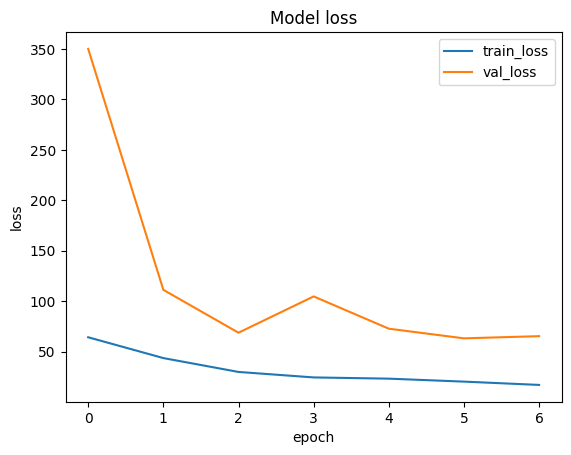

In [50]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [51]:
facialexpression_df = pd.read_csv('icml_face_data.csv')

In [52]:
facialexpression_df

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [53]:
facialexpression_df[' pixels'][0] # String format

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [54]:
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [55]:
def resize(x):

  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [56]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [57]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [58]:
facialexpression_df.head()

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...

In [59]:
facialexpression_df.shape

(24568, 2)

In [60]:
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [61]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

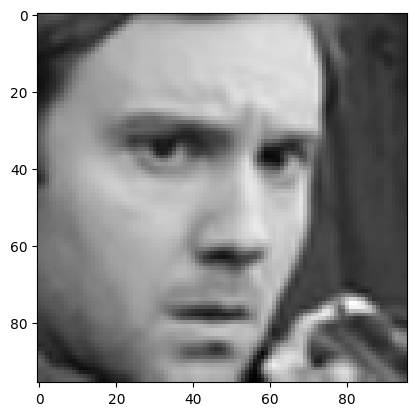

In [62]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

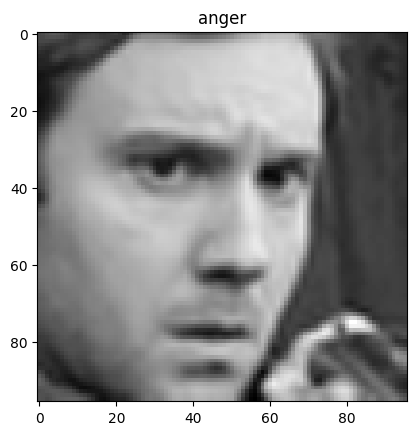

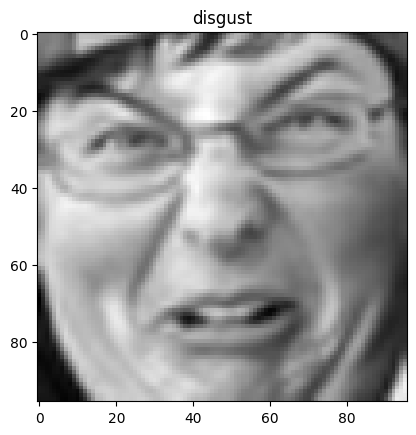

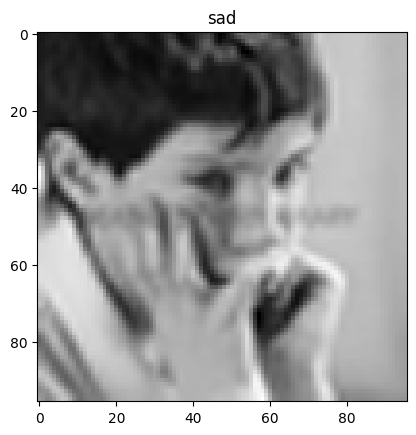

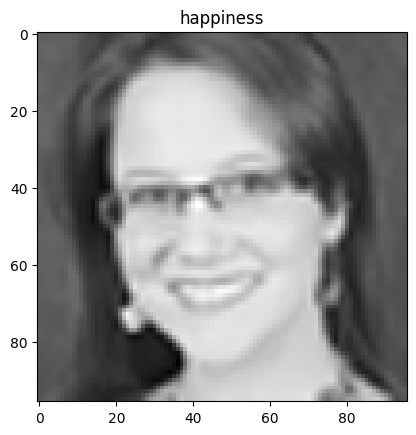

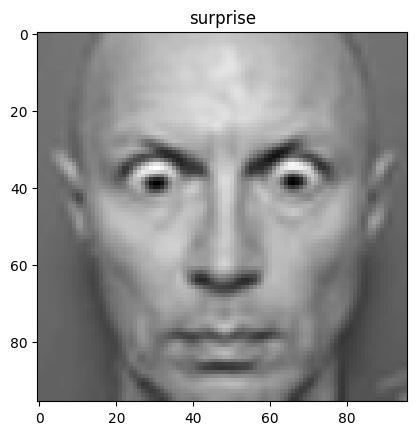

In [63]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

In [64]:
facialexpression_df.emotion.value_counts().index

Index([3, 2, 0, 4, 1], dtype='int64', name='emotion')

In [65]:
facialexpression_df.emotion.value_counts()

emotion
3    8989
2    6077
0    4953
4    4002
1     547
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

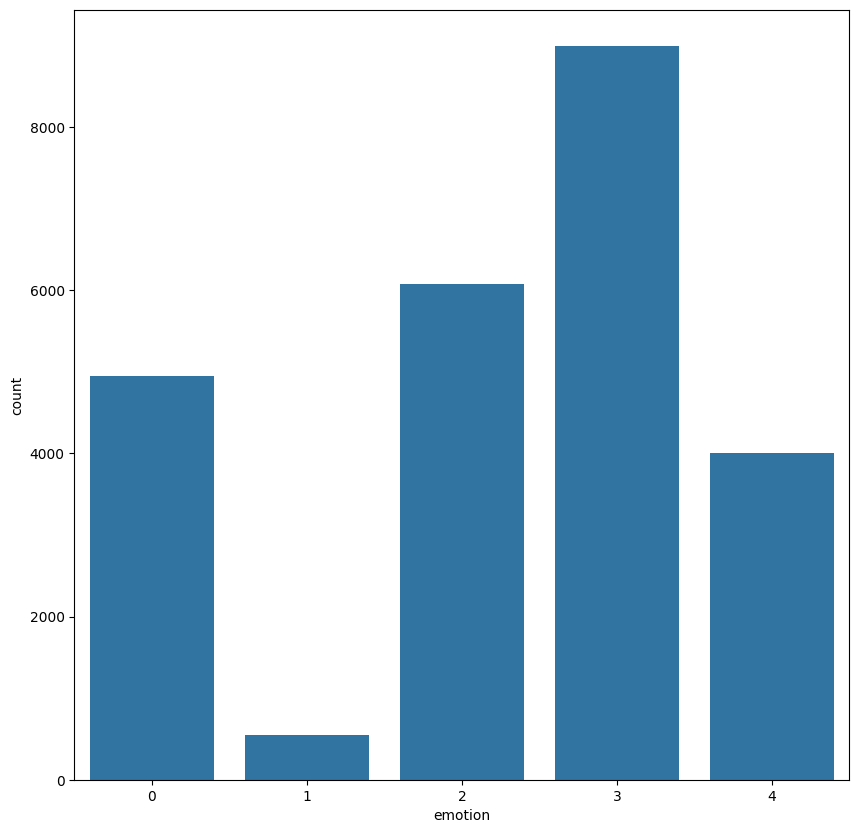

In [66]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

In [67]:
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])

In [68]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [69]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [70]:
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

In [72]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [73]:
print(X_Test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [74]:
print(X_train.shape, y_train.shape)

(22111, 96, 96, 1) (22111, 5)


In [75]:
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [76]:
X_train

array([[[[0.1206978 ],
         [0.12215175],
         [0.12455163],
         ...,
         [0.13279855],
         [0.13257775],
         [0.13241889]],

        [[0.12199935],
         [0.12297519],
         [0.12457144],
         ...,
         [0.13167438],
         [0.13403344],
         [0.13534133]],

        [[0.1240944 ],
         [0.12428278],
         [0.1245554 ],
         ...,
         [0.12975092],
         [0.13641165],
         [0.14017017]],

        ...,

        [[0.32679227],
         [0.3292586 ],
         [0.33327207],
         ...,
         [0.04632233],
         [0.03877408],
         [0.03455565]],

        [[0.32810968],
         [0.33057597],
         [0.33458945],
         ...,
         [0.04208625],
         [0.03932124],
         [0.03779782]],

        [[0.32899815],
         [0.33146447],
         [0.33547795],
         ...,
         [0.03987487],
         [0.03972407],
         [0.03967291]]],


       [[[0.3487122 ],
         [0.3489764 ],
         [0.34

In [77]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")

In [79]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filters= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filters= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filters= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 102, 102,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 48, 48,    │      3,200 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 48, 48,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 48, 48,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 23, 23,    │          0 │ activation_20[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 23, 23,    │      4,160 │ max_pooling2d_2[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 23, 23,    │        256 │ res_2_conv_a[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 23, 23,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 23, 23,    │     36,928 │ activation_21[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 23, 23,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 23, 23,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 23, 23,    │     16,640 │ activation_22[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 23, 23,    │     16,640 │ max_pooling2d_2[… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 23, 23,    │      1,024 │ res_2_conv_c[0][… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_copy      │ (None, 23, 23,    │      1,024 │ res_2_conv_copy[… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 23, 23,    │          0 │ bn_2_conv_c[0][0

 Total params: 1,235,461 (4.71 MB)

 Trainable params: 1,226,885 (4.68 MB)

 Non-trainable params: 8,576 (33.50 KB)

In [80]:

model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [82]:

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)


checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.keras", verbose = 1, save_best_only=True)

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 5, callbacks=[checkpointer, earlystopping])

Epoch 1/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5820 - loss: 1.0351
Epoch 1: val_loss improved from 1.36218 to 0.93453, saving model to FacialExpression_weights.keras
345/345 ━━━━━━━━━━━━━━━━━━━━ 1830s 5s/step - accuracy: 0.5821 - loss: 1.0350 - val_accuracy: 0.6466 - val_loss: 0.9345
Epoch 2/5
  1/345 ━━━━━━━━━━━━━━━━━━━━ 30:57 5s/step - accuracy: 0.5312 - loss: 1.2802
Epoch 2: val_loss improved from 0.93453 to 0.92716, saving model to FacialExpression_weights.keras
345/345 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.5312 - loss: 1.2802 - val_accuracy: 0.6384 - val_loss: 0.9272
Epoch 3/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6570 - loss: 0.8746
Epoch 3: val_loss did not improve from 0.92716
345/345 ━━━━━━━━━━━━━━━━━━━━ 1849s 5s/step - accuracy: 0.6571 - loss: 0.8746 - val_accuracy: 0.5375 - val_loss: 1.1005
Epoch 4/5
  1/345 ━━━━━━━━━━━━━━━━━━━━ 29:44 5s/step - accuracy: 0.6875 - loss: 0.9185
Epoch 4: val_loss did not improve from 0.92716
345/345 

In [86]:
model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

In [88]:
with open('FacialExpression-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('FacialExpression_weights.keras')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [89]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 ━━━━━━━━━━━━━━━━━━━━ 25s 562ms/step - accuracy: 0.6289 - loss: 0.9466
Test Accuracy: 0.636289656162262


In [90]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [91]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

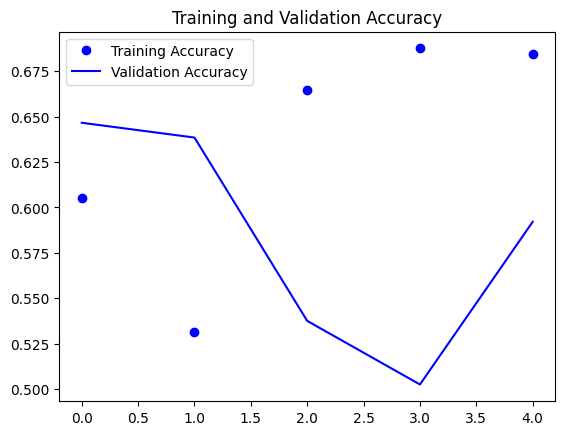

In [92]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

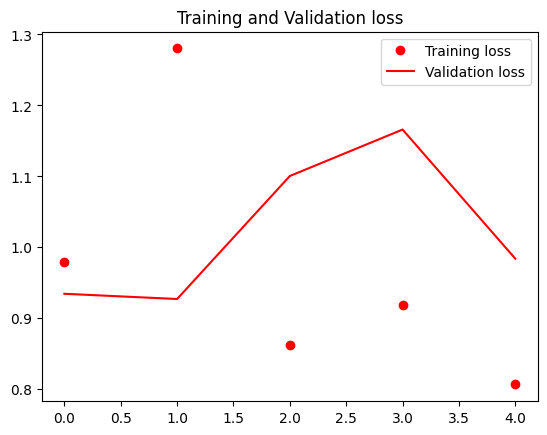

In [93]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [94]:
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

39/39 ━━━━━━━━━━━━━━━━━━━━ 25s 599ms/step


In [95]:
y_true.shape

(1229,)

<Axes: >

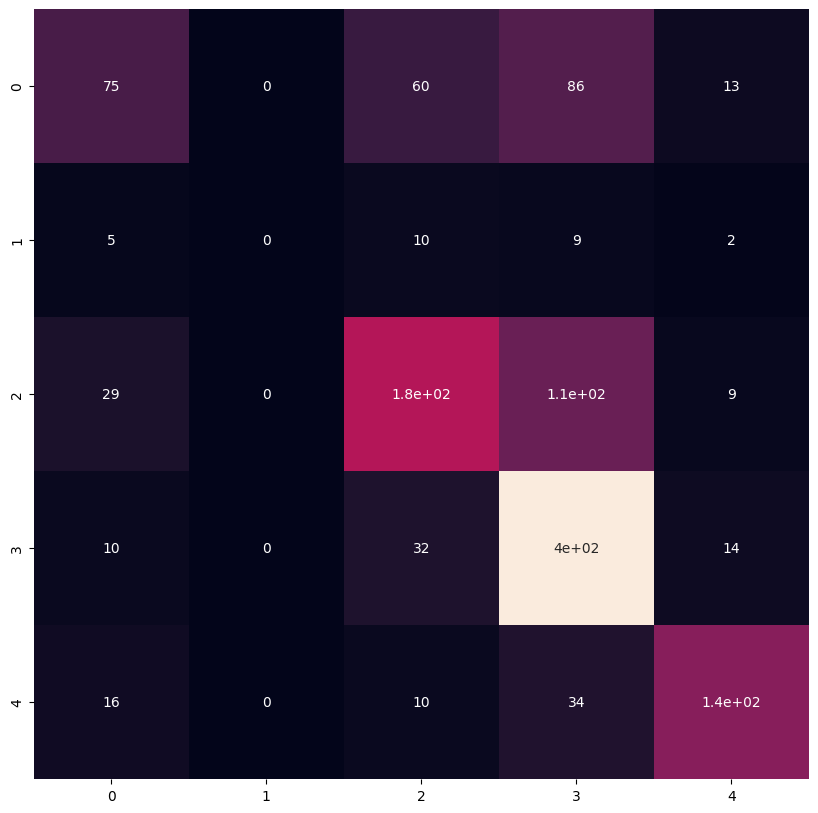

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

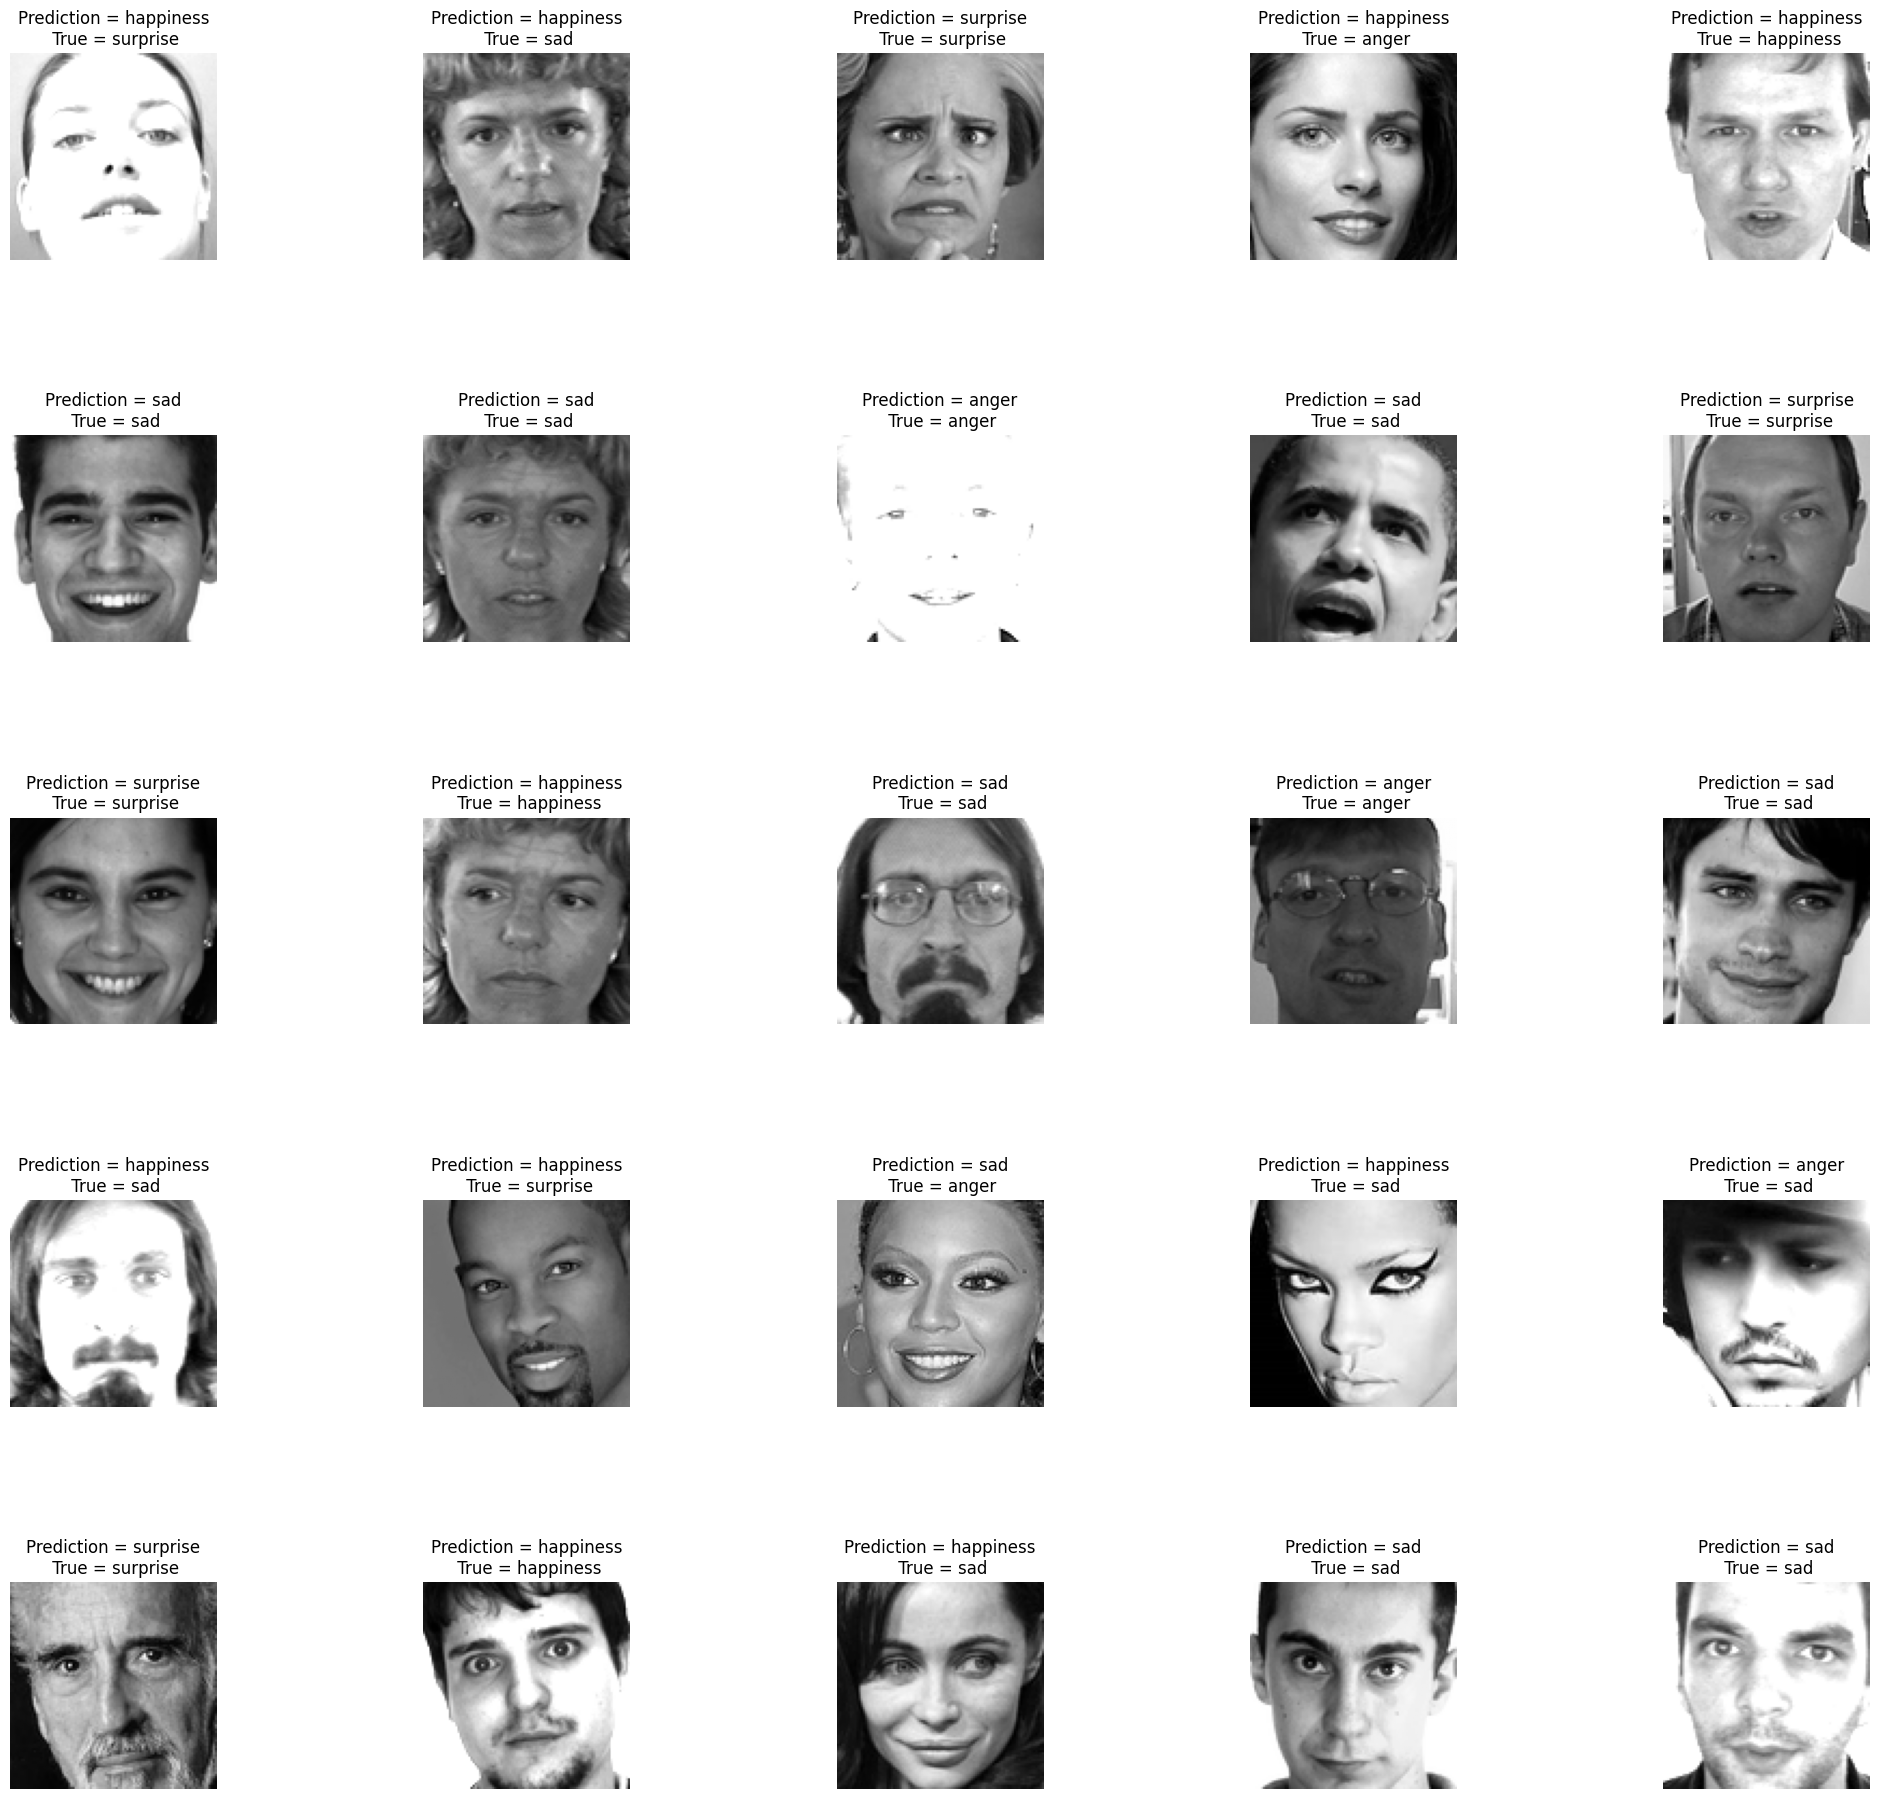

In [97]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.56      0.32      0.41       234
           1       0.00      0.00      0.00        26
           2       0.61      0.55      0.58       322
           3       0.63      0.88      0.73       452
           4       0.78      0.69      0.73       195

    accuracy                           0.64      1229
   macro avg       0.51      0.49      0.49      1229
weighted avg       0.62      0.64      0.61      1229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [100]:
df_predict = predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 605ms/step


In [101]:
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.530609          37.146107           29.742496   
1          66.160393          37.185032           30.391220   
2          66.038826          37.846691           29.823286   
3          61.360207          35.885529           28.993532   
4          65.136620          36.713825           28.688326   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           37.797112                58.172501                38.081238   
1           36.730309                59.663685                37.385933   
2           36.151703                59.221157                38.060608   
3           36.008583                55.141914                36.653099   
4           36.444931                57.965137                37.302044   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                72.811409                37.530018                 36.453472   
1                71.947189                36.976498                 36.748383   
2                72.859772                38.014507                 35.745590   
3                66.843826                35.872402                 35.228645   
4                71.758072                36.821720                 35.839455   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 38.886696  ...   55.960522            63.147964   
1                 36.902569  ...   56.531063            63.138161   
2                 37.187622  ...   59.522320            61.283287   
3                 36.807159  ...   58.810009            57.634789   
4                 36.948990  ...   60.861156            61.763058   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            75.053108             33.897499             77.330070   
1            74.111488             34.686874             75.460548   
2            76.881775             32.050488             77.124367   
3            73.638901             31.345686             74.719193   
4            75.792435             31.951860             76.838577   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               48.660069               71.882515                  49.402172   
1               48.744869               69.688988                  48.706306   
2               47.737278               74.582886                  47.126278   
3               45.964123               74.503273                  45.564640   
4               45.717823               74.400688                  46.922733   

   mouth_center_bottom_lip_y  emotion  
0                  81.696907        3  
1                  81.987183        3  
2                  83.189796        0  
3                  77.546165        3  
4                  82.821938        3  

[5 rows x 31 columns]

/tmp/ipython-input-102-2722063523.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


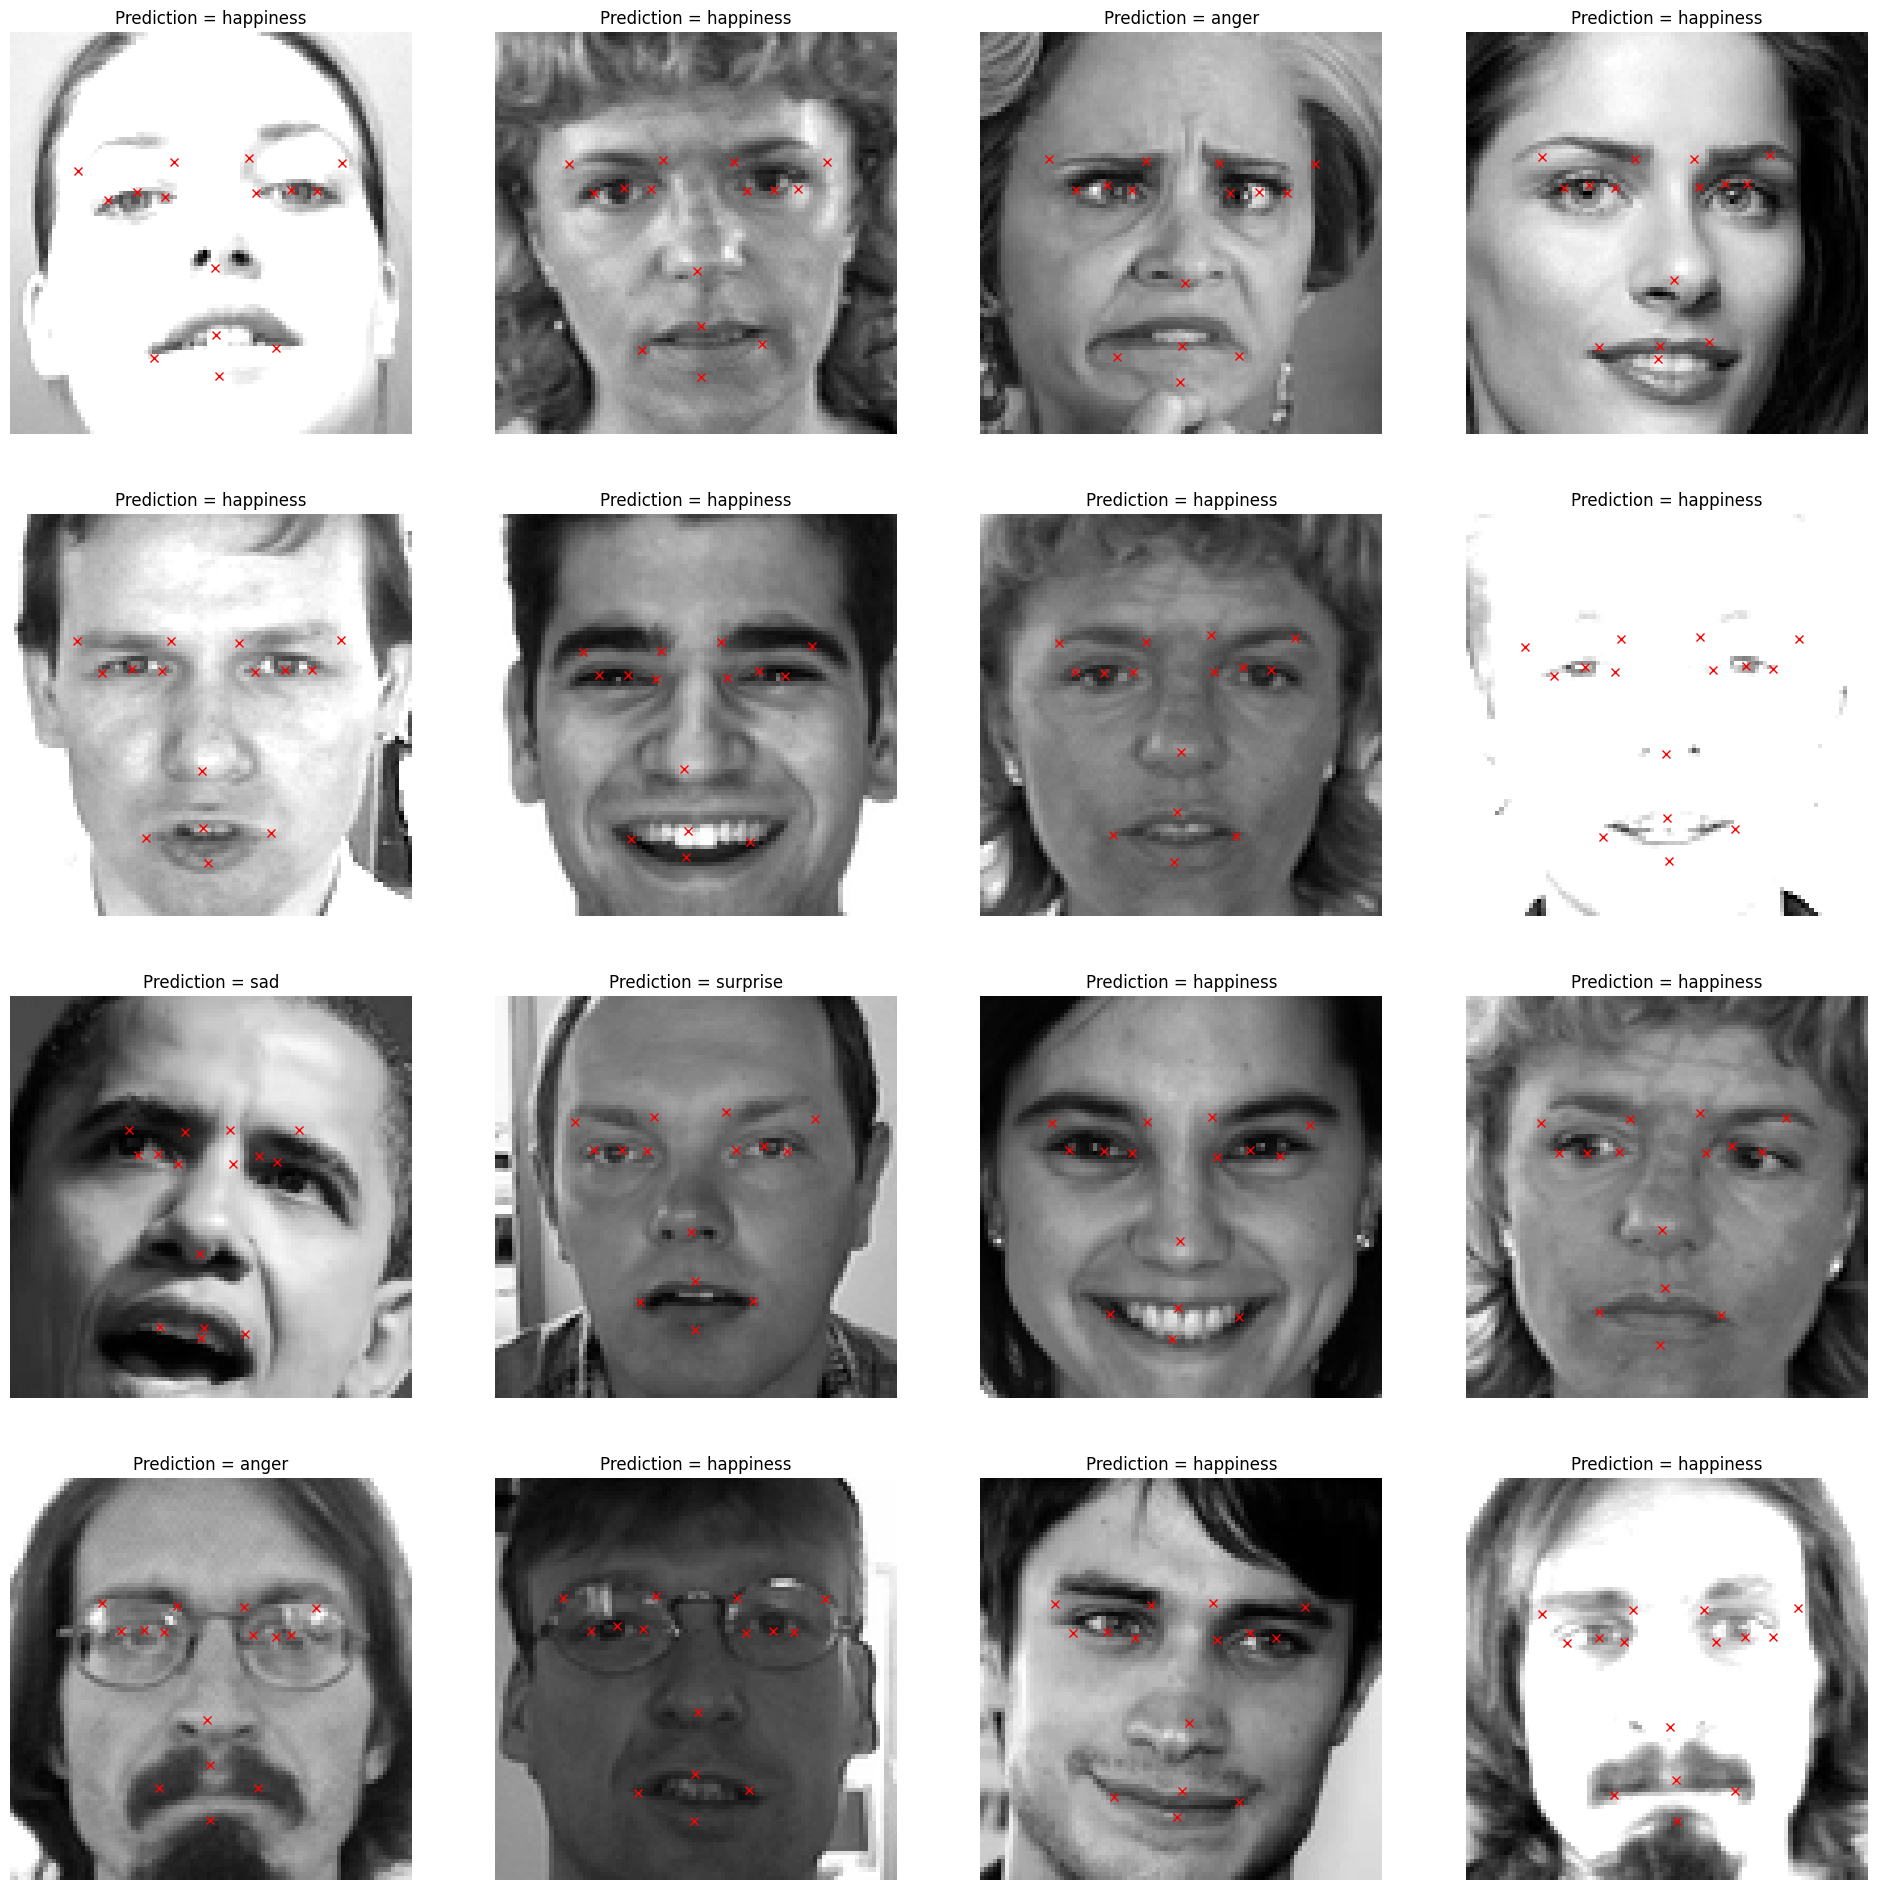

In [102]:
fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

In [103]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
  MODEL_DIR = directory
  version = 1

  # Let's join the temp model directory with our chosen version number
  # The expected result will be = '\tmp\version number'
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  # Let's save the model using saved_model.save
  # If the directory already exists, we will remove it using '!rm'
  # rm removes each file specified on the command line.

  if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

  tf.saved_model.save(model, export_path)

  os.environ["MODEL_DIR"] = MODEL_DIR

In [104]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  23348      0 --:--:-- --:--:-- --:--:-- 23357
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 Packages [342 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://storage.googleapis.com/tensorflow-serving-apt stabl

In [105]:
# Let's install tensorflow model server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 36 not upgraded.
Need to get 649 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.19.0 [649 MB]
Fetched 649 MB in 9s (69.3 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.19.0_all.deb ...
Unpacking tensorflow-model-server (2.19.0) ...
Setting up tensorflow-model-server (2.19.0) ...


In [106]:
deploy('/model', model_1_facialKeyPoints)

export_path = /model/1



In [107]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [108]:
!tail server.log

I0000 00:00:1753389356.621428   57668 loader_harness.cc:71] Approving load for servable version {name: keypoint_model version: 1}
I0000 00:00:1753389356.621877   57668 loader_harness.cc:79] Loading servable version {name: keypoint_model version: 1}
I0000 00:00:1753389356.919190   57668 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


In [109]:
deploy('/model1', model_2_emotion)

export_path = /model1/1



In [110]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [111]:
!tail server.log

I0000 00:00:1753389366.751510   59283 loader_harness.cc:71] Approving load for servable version {name: emotion_model version: 1}
I0000 00:00:1753389366.752115   59283 loader_harness.cc:79] Loading servable version {name: emotion_model version: 1}
I0000 00:00:1753389366.879649   59283 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
I0000 00:00:1753389367.673331   59283 loader_harness.cc:105] Successfully loaded servable version {name: emotion_model version: 1}
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 261] NET_LOG: Entering the event loop ...


In [112]:
import json

# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 7], [0.23529411852359772], [0.22745098173618317]]]]}


In [113]:
!pip install -q requests

In [114]:
import requests

# Function to make predictions from deployed models
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [116]:
df_predict

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.530609          37.146107           29.742496   
1             66.160393          37.185032           30.391220   
2             66.038826          37.846691           29.823286   
3             61.360207          35.885529           28.993532   
4             65.136620          36.713825           28.688326   
...                 ...                ...                 ...   
1279          29.029270          35.579868           62.634628   
1280          54.834381          34.935783           39.153416   
1281          65.715736          36.877171           29.010786   
1282          29.977989          36.104126           65.094322   
1283          63.533707          35.915211           29.871494   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              37.797112                58.172501                38.081238   
1              36.730309                59.663685                37.385933   
2              36.151703                59.221157                38.060608   
3              36.008583                55.141914                36.653099   
4              36.444931                57.965137                37.302044   
...                  ...                      ...                      ...   
1279           35.397141                36.041607                36.631824   
1280           35.143311                50.873737                36.167252   
1281           36.901413                58.233891                37.590317   
1282           37.208202                37.102505                37.041126   
1283           35.377609                57.038799                36.892403   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   72.811409                37.530018   
1                   71.947189                36.976498   
2                   72.859772                38.014507   
3                   66.843826                35.872402   
4                   71.758072                36.821720   
...                       ...                      ...   
1279                21.355209                35.891808   
1280                57.980671                34.693783   
1281                71.866928                37.552841   
1282                22.830742                36.553970   
1283                68.700394                35.970066   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.453472                 38.886696  ...   55.960522   
1                    36.748383                 36.902569  ...   56.531063   
2                    35.745590                 37.187622  ...   59.522320   
3                    35.228645                 36.807159  ...   58.810009   
4                    35.839455                 36.948990  ...   60.861156   
...                        ...                       ...  ...         ...   
1279                 55.117638                 36.821396  ...   57.261219   
1280                 40.771126                 37.030174  ...   59.411144   
1281                 35.741165                 37.353024  ...   56.089008   
1282                 57.841496                 38.336384  ...   57.293430   
1283                 36.065239                 36.177261  ...   55.608009   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               63.147964            75.053108             33.897499   
1               63.138161            74.111488             34.686874   
2               61.283287            76.881775             32.050488   
3               57.634789            73.638901             31.345686   
4               61.763058            75.792435             31.951860   
...                   ...                  ...                   ...   
1279            31.610294            74.065903             61.218567   
1280            55.242451            72.797668             41.938591   
1281  

/tmp/ipython-input-117-3519106100.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


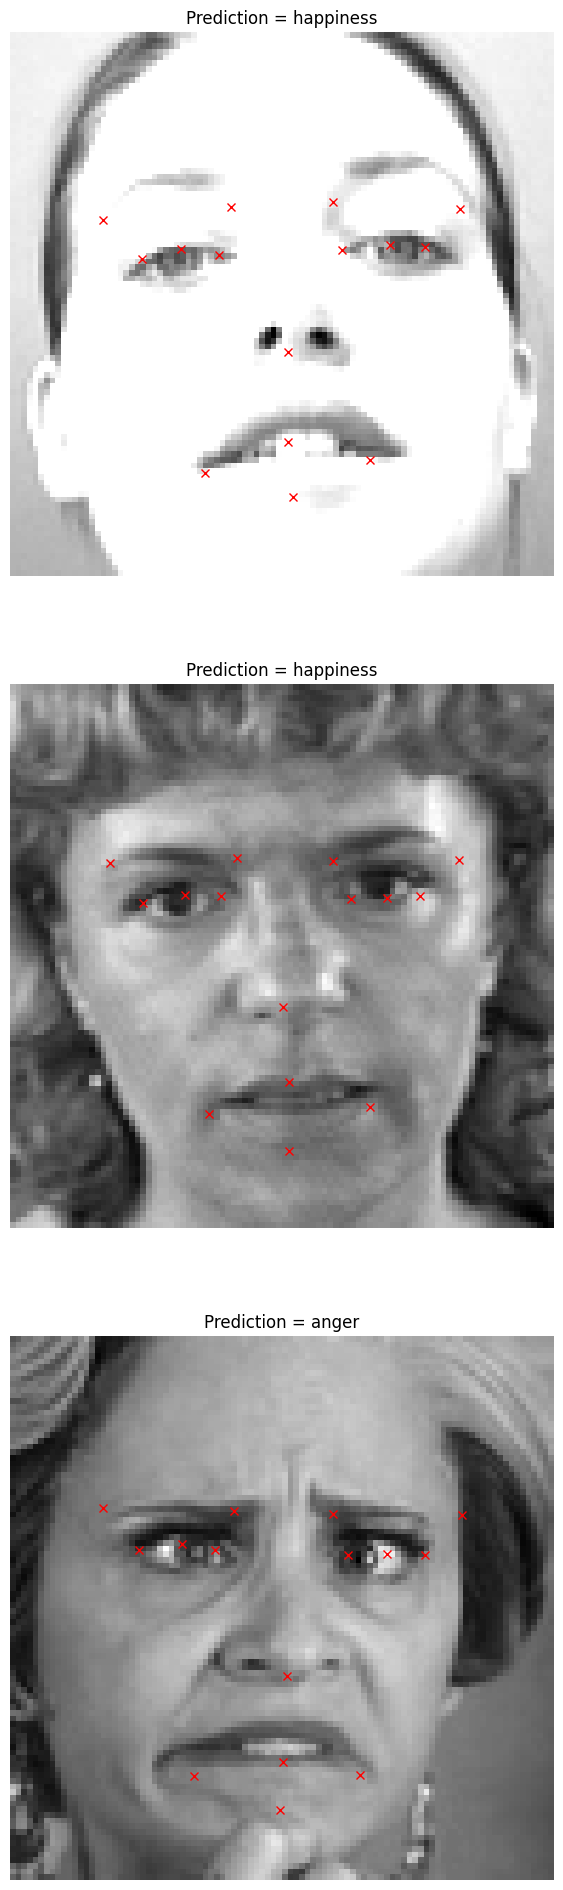

In [117]:
# Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
